

# Project: Investigating a Movie Dataset TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

The Movie Dataset frm TMDb is a movie database that contains 10, 866 ros and 21 column with data on movies going as far back as 1960. The data from TMDb contains a lot on movies, casts, directors an dproduction companies and obviously not forgetting the money number behind the movie itself. Money numbers ranging from budget to revenue and the adjusted revenue and budget etc.

In this presentation analysis, I would be tackling some of the questions i found intersting. Such questions are:
Which Genres are more popular from year to year? 
What kind of properties are associated with Higher Revenues?
Then it was time to talk about the top movies based on a range of attributes. Properties such as Revenue, Budget, Popularity, Average Votes and most importantly Profit


In [57]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [58]:
# I loaded the dataset into a dataframe i called df_tmdb
#  this is where i investigate the data to look for missing values and/or datatypes that arent correct
from google.colab import files
uploaded =files.upload()


Saving tmdb-movies.csv to tmdb-movies (1).csv


In [59]:
import io 
df_tmdb =pd.read_csv(io.BytesIO(uploaded['tmdb-movies.csv']))

In [60]:
# this line of code is to preview the dataframe

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [61]:
# let us get the shape of the dataframe
# the dataframe has 10,866 rows and 21 columns 
df_tmdb.shape


(10866, 21)

In [62]:
# to understand the numerical data of the dataframe
# from here we can understand that some movies didnt have any budget while the highest budget used for a movie was 425,000,000
# from this, we also gather that the data studied started its entries from 1960 and is as updated as the year 2015
# since no currency was given for the figures such as budget, revenue, budget_adj and revenue_adj we would use USDollars as the presumed currency
# using revenue table the highest grossing movie was 2.78 billion
# some movies on the dataset suprisingly dont have any runtime minutes maybe in data entry or something else, the longest runtime is 900 minutes long
# the highest rating was 9.2 while the lowest was 1.5
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
# so as to get information on the datatypes as well as null counts of all the columns 
# from here we understand that columns cast, homepage, director,tagline, 9373, overview, genres and production companies have null values which is not meant to be 
# on second looking column release_date is registered as an object instead of datetime
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [64]:
# here we confirm the sum count of the null columns 
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [65]:
# here we fill all the empty records with 0
df_tmdb.fillna(0, inplace=True)

In [66]:
# here we confirm that there arent any more null values
df_tmdb.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64



### Data Cleaning (Replace this with more specific notes!)

**Handling Duplicates**

In [67]:
#checking first for duplicate sum across the dataframe
df_tmdb.duplicated().sum()


1

In [68]:
# lets then drop the duplicates from the dataset
df_tmdb.drop_duplicates(inplace=True)

In [69]:
#lets confirm that there arent any more duplicates
df_tmdb.duplicated().sum()

0

**Changing from Object String to Datetime Format**

In [70]:
#we finally change release_date column from string to datetime and preview it
#we confrim that the dtype has been changed from the information at the bottom of the cell
# the column release_date is in 'yyyy-mm-dd' format
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**To remove unwanted columns from the dataframe**

In [71]:
# to drop unwanted columns 
# unwanted columns refers columns that would not be needed in the scope of this investigation
# columns such as imdb_id, popularity, homepage, tagline, overview
# we then return the shape of the dataset after the drop
df_tmdb.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_tmdb.shape

(10865, 15)

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 : Which genres are most popular from year to year?

In [72]:
# to work on the genre column we need to split since some movies may appear in more than one genre
# to split the genres string 
# we decide to create a function for the purpose

df_tmdb.genres = df_tmdb.genres.str.split('|')

# we then create a new row for each of the genres that hahve been split
df_tmdb = df_tmdb.explode('genres')

In [73]:
# we then group using release year and popularity
df_tmdb.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

genredf = df_tmdb.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

genredf = genredf.reset_index()

In [74]:
genredf.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


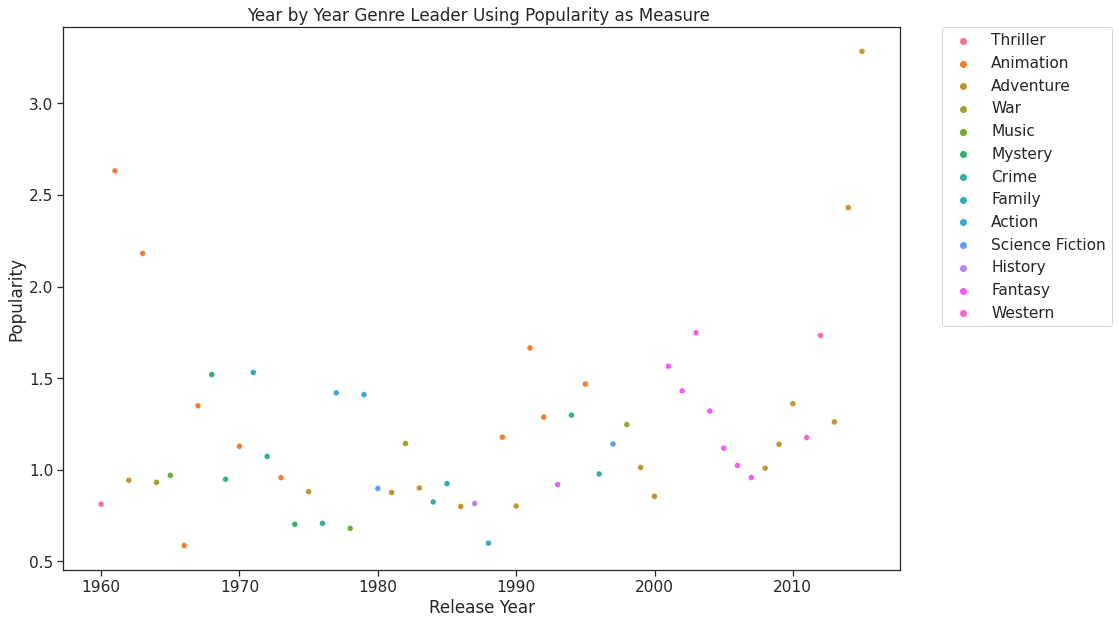

In [75]:
# we then plot a graph using seaborn so as to get the year to year genre leaders

#set chart dimension
plt.figure(figsize=(15,10))

#set plotting style
sns.set_style('ticks')

#set title
plt.title('Year by Year Genre Leader Using Popularity as Measure ')
plt.xlabel('Release Year')
plt.ylabel('Popularity')

#draw scatter plot
sns.scatterplot(x="release_year", y="popularity", hue="genres", data=genredf)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

**Although there is no clear trend, it is obvious Adventure is the most popular genre.**
**In the early 2000's Fantasy was the most popular genre and at the emergence of 2010's Adventure took over**
**Animation, Crime and Action are also popular as shown in the chart above **

**Question 2 : What kind of properties are associated with movies that have higher revenues?**

In [76]:
# from the dataset given we take that revenue can be impacted by budget and popularity
# we also see that revenue should also be impacted by profits
# therefore we would create a new column called 'Profits'
df_tmdb['Profit'] = df_tmdb['revenue'] - df_tmdb['budget']
df_tmdb['Profit'].head()

0    1363528810
0    1363528810
0    1363528810
0    1363528810
1     228436354
Name: Profit, dtype: int64

In [77]:
#let us see our new column in the table
df_tmdb.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


In [78]:
#earlier we found out that some of the rows in budget were 0 whichh is not possible or useful in calculating for profit
# so we drop all rows 0 and below from the dataset
correlation_rev = df_tmdb.query('budget > 0')
correlation_rev

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Comedy,Universal Pictures,2066-01-20,14,6.1,1966,-700000
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Family,Universal Pictures,2066-01-20,14,6.1,1966,-700000
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Mystery,Universal Pictures,2066-01-20,14,6.1,1966,-700000
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,newspaper|haunted house|organ|slapstick|trial,90,Romance,Universal Pictures,2066-01-20,14,6.1,1966,-700000


In [79]:
# First of We would do a distribution of the various properties 
def plot_box(feature):
  df_tmdb.boxplot(feature, vert=True, showfliers=False)

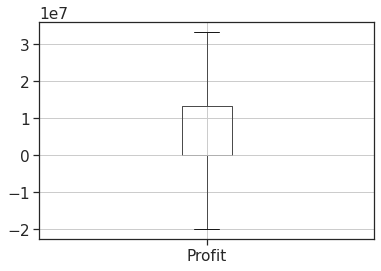

In [80]:
#distribution of profit
plot_box('Profit')

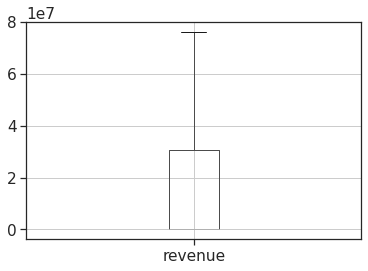

In [81]:
#distribution of revenue
plot_box('revenue')

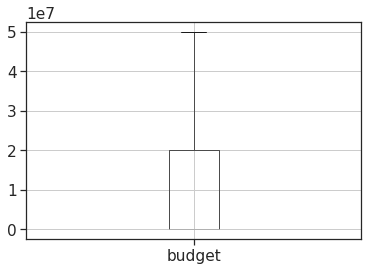

In [82]:
#distribution of budget
plot_box('budget')

In [83]:
# next we calculate the correlation
correlation_rev.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,Profit
id,1.000000,0.131383,-0.046652,-0.019125,-0.055817,0.072453,-0.060017,0.467827,-0.009271
popularity,0.131383,1.000000,0.476433,0.639425,0.188220,0.782209,0.317427,0.160757,0.616575
budget,-0.046652,0.476433,1.000000,0.693133,0.247553,0.590589,0.101829,0.249948,0.531512
revenue,-0.019125,0.639425,0.693133,1.000000,0.214559,0.778892,0.259899,0.134633,0.978971
runtime,-0.055817,0.188220,0.247553,0.214559,1.000000,0.234396,0.320936,-0.116398,0.182076
vote_count,0.072453,0.782209,0.590589,0.778892,0.234396,1.000000,0.379724,0.192873,0.748160
vote_average,-0.060017,0.317427,0.101829,0.259899,0.320936,0.379724,1.000000,-0.158013,0.276598
release_year,0.467827,0.160757,0.249948,0.134633,-0.116398,0.192873,-0.158013,1.000000,0.087473
Profit,-0.009271,0.616575,0.531512,0.978971,0.182076,0.748160,0.276598,0.087473,1.000000


In [84]:
# we then proceed to group the genre so as to create an aggregated table using genre as the index

correlation_rev =correlation_rev.groupby('genres', as_index=False).agg({'budget':'sum', 'revenue':'sum', 'Profit':'sum', 'popularity':'mean'})

#sort by highest revenue that
correlation_rev = correlation_rev.sort_values(by='revenue', ascending=False)

#cconverting revenue, budget and profit to a billion
correlation_rev['revenue'] = correlation_rev['revenue']/1000000000
correlation_rev['Profit'] = correlation_rev['Profit']/1000000000
correlation_rev['budget'] = correlation_rev['budget']/1000000000


correlation_rev

,genres,budget,revenue,Profit,popularity
0,Action,66.103124,169.886215,103.783091,1.298258
1,Adventure,55.226775,163.500596,108.273822,1.621153
3,Comedy,50.438994,132.183056,81.744062,0.882567
6,Drama,56.552217,130.518679,73.966462,0.859592
17,Thriller,50.022766,117.679517,67.656751,1.035913
8,Fantasy,29.873128,86.420717,56.547589,1.469079
7,Family,28.755344,86.340257,57.584913,1.269229
15,Science Fiction,30.691424,85.081293,54.389868,1.501626
14,Romance,21.453537,57.193921,35.740384,0.842563
4,Crime,23.916787,54.777153,30.860366,0.987654


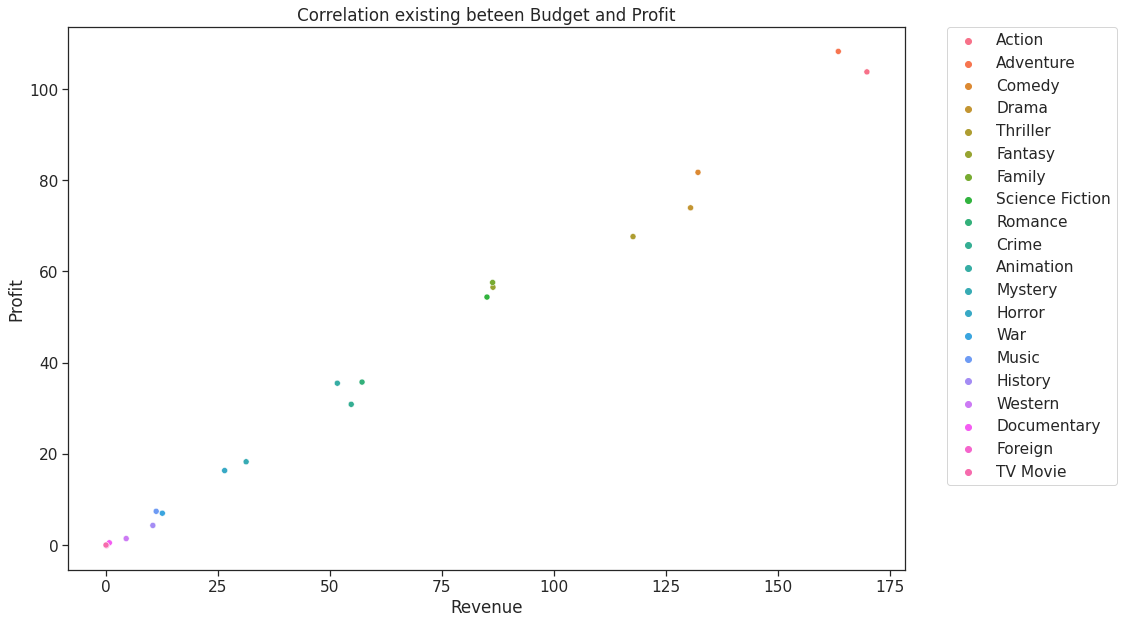

In [85]:
# its time to plot the graph to prove the positive correlation between Budget and Profit

#set chart dimension
plt.figure(figsize=(15,10))

#set plotting style
sns.set_style('ticks')

#set title
plt.title('Correlation existing beteen Budget and Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')

#draw scatter plot
sns.scatterplot(x="revenue", y="Profit", hue="genres", data=correlation_rev)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

There is a positive correlation between Revenue and Profits


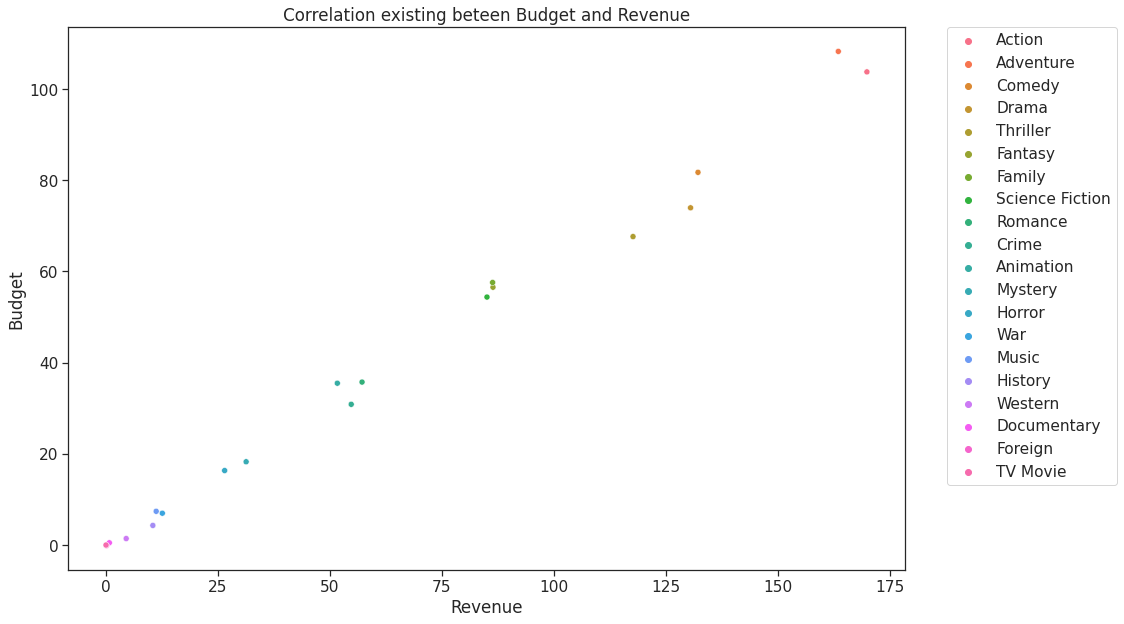

In [86]:
# its time to plot the graph to prove the positive correlation between Budget and Revenue

#set chart dimension
plt.figure(figsize=(15,10))

#set plotting style
sns.set_style('ticks')

#set title
plt.title('Correlation existing beteen Budget and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')

#draw scatter plot
sns.scatterplot(x="revenue", y="Profit", hue="genres", data=correlation_rev)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

There is an obvious correlation beteween Budget and Revenue

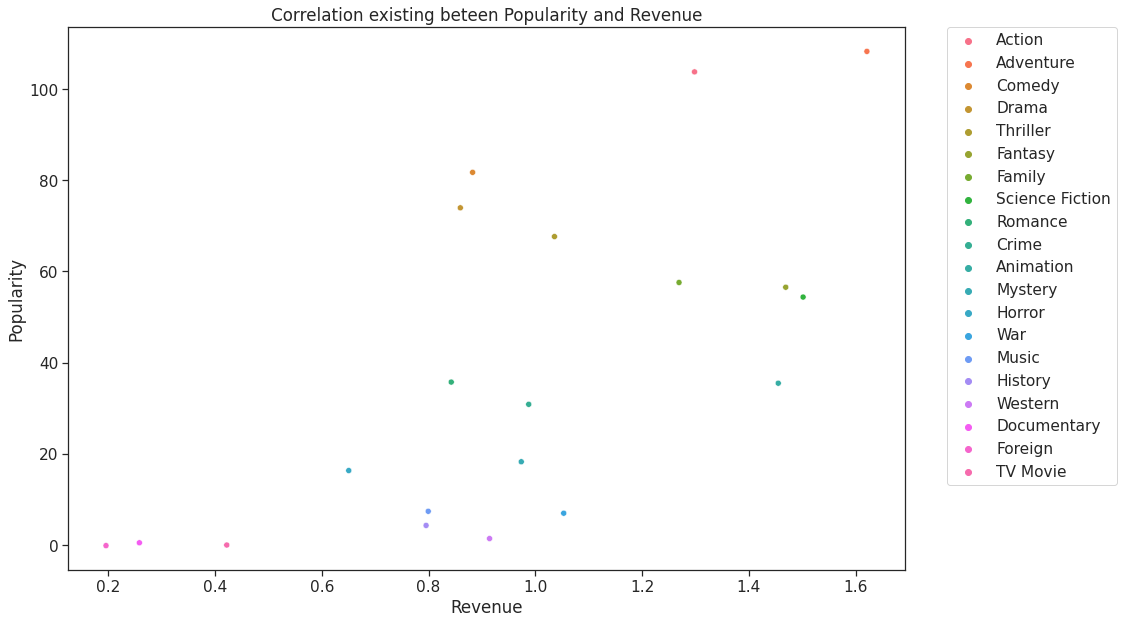

In [87]:
# its time to plot the graph to prove the positive correlation between Popularity and Revenue

#set chart dimension
plt.figure(figsize=(15,10))

#set plotting style
sns.set_style('ticks')

#set title
plt.title('Correlation existing beteen Popularity and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Popularity')

#draw scatter plot
sns.scatterplot(x="popularity", y="Profit", hue="genres", data=correlation_rev)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

There correlation between Popularity and Revenue is definitely not that positive

**Movie Genres that have High Revenue are directly associated with higher budgets and Profits but higher Popularity does not have any correlation on Revenue ***

In [88]:
#For the next few questions we'd be plotting graphs to show top movies using different features

revenue_dict = {}

movies_revenue = df_tmdb[["original_title", "revenue"]]
movies_budget = df_tmdb[["original_title", "budget"]]
movies_popularity= df_tmdb[["original_title", "popularity"]]
movies_votes = df_tmdb[["original_title", "vote_average"]]
movies_profit = df_tmdb[["original_title", "Profit"]]

**Question 3: What are the Top 5 Movies Based on Revenue**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


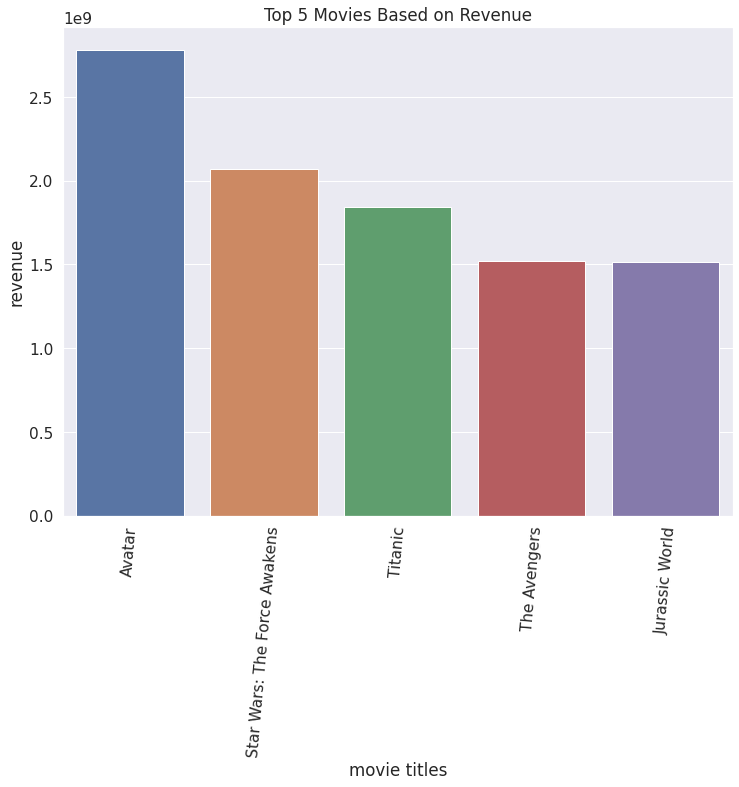

In [89]:
#plotting movies based on Revenue
snsset = sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)

ax = sns.barplot(
    movies_revenue.sort_values(by = "revenue", ascending=False).head(18).original_title, movies_revenue.sort_values(by = "revenue", ascending=False).head(18).revenue
)
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='movie titles', ylabel='revenue', title = 'Top 5 Movies Based on Revenue')
plt.show()

**Avatar leads the pack with above 2.5 billion in Revenue, followed by Star Wars: The Force Awakens which is closely followed by Titanic and then The Avengers and Jurassic World**

**Question 4: What are the top 5 movies based on Budget?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


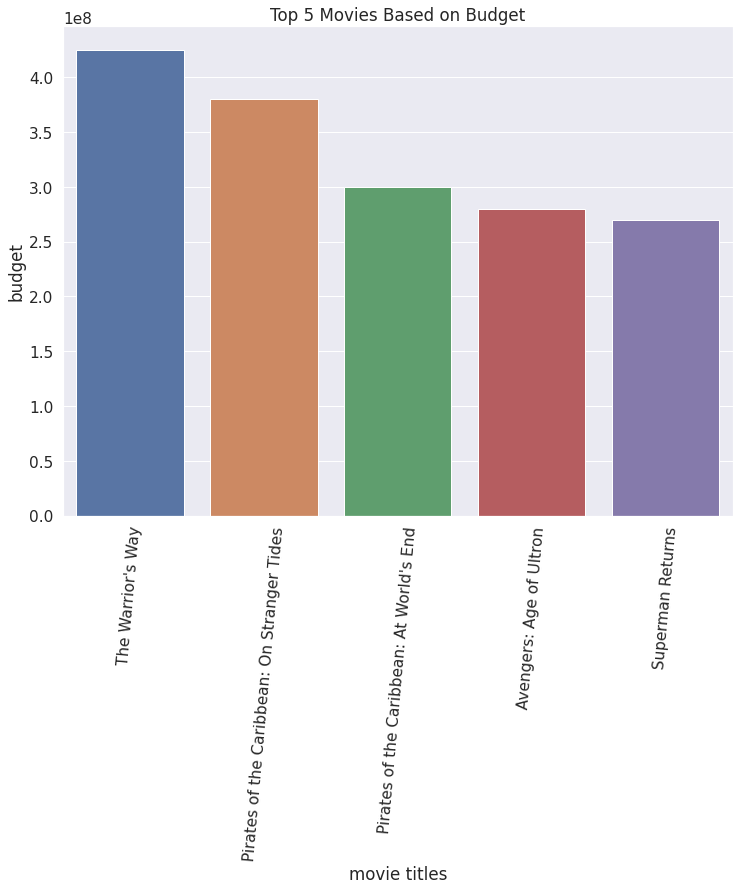

In [90]:
#plotting movies based on Budget
snsset

ax = sns.barplot(
    movies_budget.sort_values(by = "budget", ascending=False).head(18).original_title, movies_budget.sort_values(by = "budget", ascending=False).head(18).budget
)
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='movie titles', ylabel='budget', title = 'Top 5 Movies Based on Budget')
plt.show()


**Budget wise we had The Warriors Way and Pirates of Carribean: On Stranger Tides having a budget of over 300 million. Pirates of the Carribean At World's End just hit the 300 million mark while closely followed by Avengers: Age of Ultron and Superman Returns**

**Question 6: Which are the top movies Based on Popularity?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


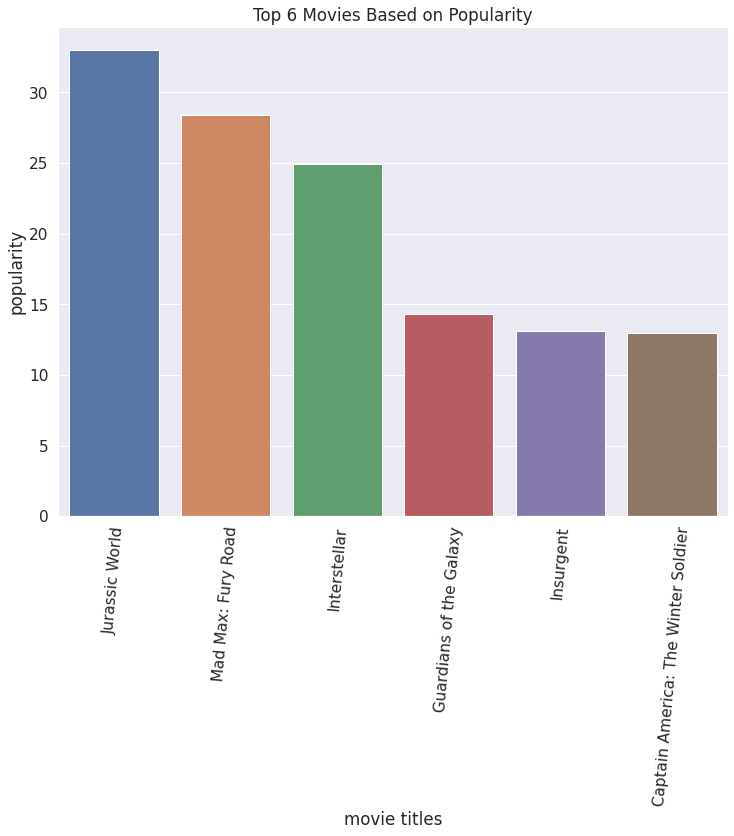

In [91]:
#plotting movies based on Popularity
snsset

ax = sns.barplot(
    movies_popularity.sort_values(by = "popularity", ascending=False).head(18).original_title, movies_popularity.sort_values(by = "popularity", ascending=False).head(18).popularity
)
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 6 Movies Based on Popularity')
plt.show()

**Jurassic World led Mad Ma: Fury Road and Interstellar in the top movies based on Popularity. Guardian of the Galaxy, Insurgen and Captain America: The Winter Soldier rounded out the Top 6**

**Question 6: What are the Top Movies in Respect to Votes?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


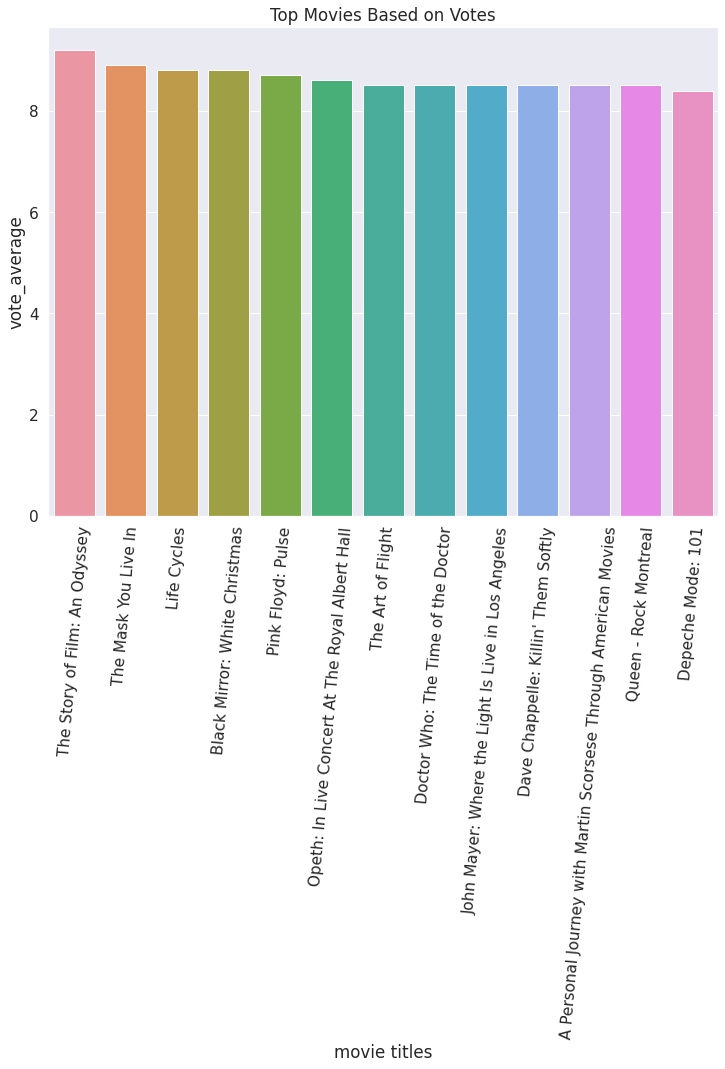

In [92]:
#plotting movies based on Votes
snsset

ax = sns.barplot(
    movies_votes.sort_values(by = "vote_average", ascending=False).head(18).original_title, movies_votes.sort_values(by = "vote_average", ascending=False).head(18).vote_average
)
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='movie titles', ylabel='vote_average', title = 'Top Movies Based on Votes')
plt.show()

**Question 7: What are the top Movies in Respect to Profit?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


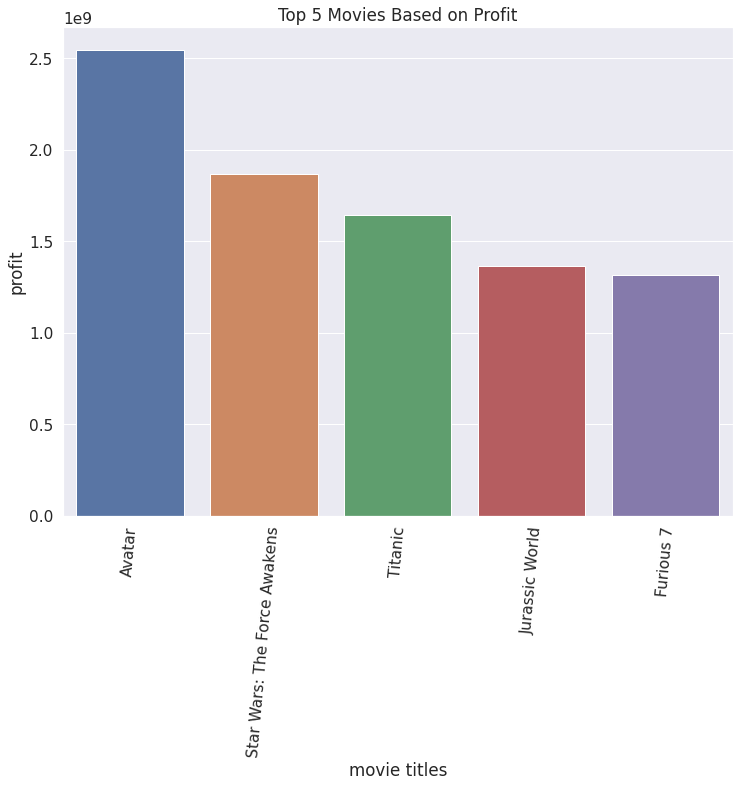

In [93]:
#plotting movies based on Profit
snsset

ax = sns.barplot(
    movies_profit.sort_values(by = "Profit", ascending=False).head(18).original_title, movies_profit.sort_values(by = "Profit", ascending=False).head(18).Profit
)
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='movie titles', ylabel='profit', title = 'Top 5 Movies Based on Profit')
plt.show()

**Avatar made in excess of 2.5billion in revenue as no other film has cracked the 2 billion mark. Star Wars: The Force Awakens, Titanic, Jurassic World and Furious 7 complet the Top 5 above the 1 billion mark.**

In [94]:
#defining a function to grou by columns according to various properties so a
def groupby_plot(cola, colb):
  
  df_tmdb.groupby(cola).mean()[colb].plot(kind='bar',color="#2E86C1", fontsize=12)
  

In [95]:
#defining a function to avoid repeating code for the labeling of the graph
def labeling(a, b, c):
  plt.xlabel(a, fontsize=14)
  plt.ylabel(b, fontsize=14)
  plt.title(c, fontsize=18)

**Question 8: What Genre had the Highest Average Budget?**

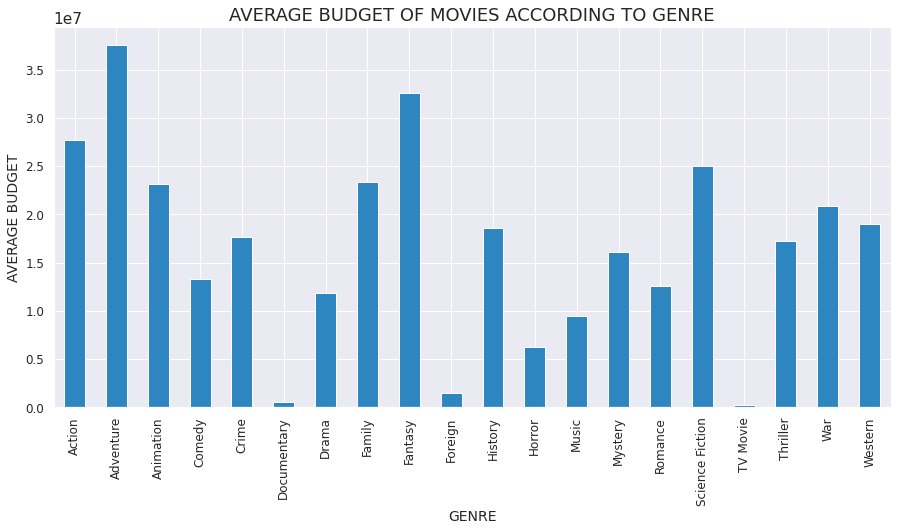

In [96]:
#plotting Graph of average budget according to genre
plt.figure(figsize=(15,7))
groupby_plot('genres', 'budget')
labeling('GENRE', 'AVERAGE BUDGET', 'AVERAGE BUDGET OF MOVIES ACCORDING TO GENRE')
plt.show()

**Looking at the Chart, we can deduce that Adventure movies had the highest Budget with an average of 375 million followed by Fantasy movies which had an average of about 325 million, rounding up the top 3 are Action movies which fell below the 300 million mark**

**Question 9: Which Genre had the Highest Average Revenue?**

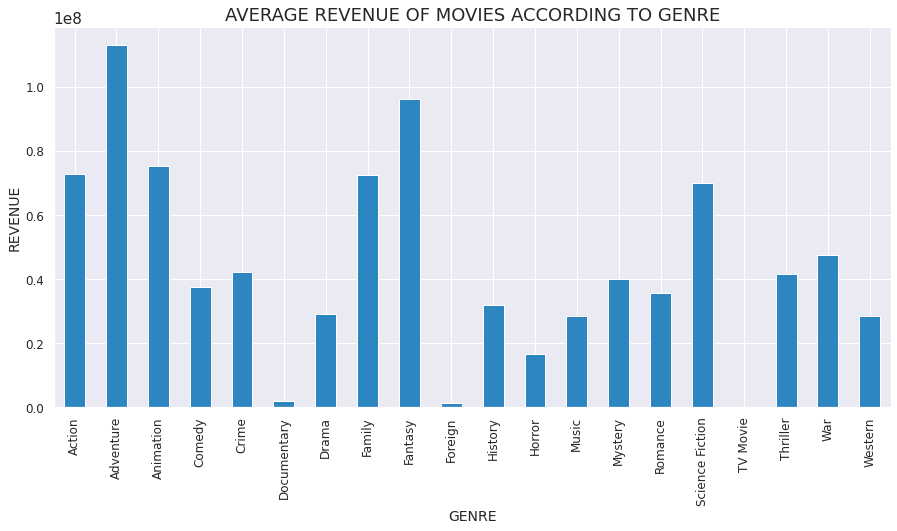

In [97]:
#plotting Graph of average budget according to genre
plt.figure(figsize=(15,7))
groupby_plot('genres', 'revenue')
labeling('GENRE', 'REVENUE', 'AVERAGE REVENUE OF MOVIES ACCORDING TO GENRE')
plt.show()

**As Expected, Adventure movies received the highest revenue followed by Fantasy Movies. Animation, Action, Family and Science Fiction Movies all hovered.**

**Question 10: Which Genre had the Highest average Profit?**

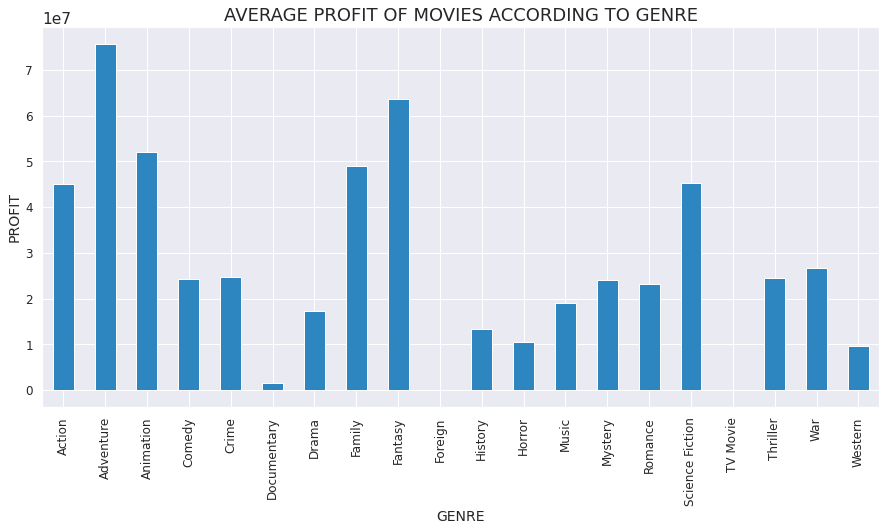

In [98]:
#plotting Graph of average budget according to genre
plt.figure(figsize=(15,7))
groupby_plot('genres', 'Profit')
labeling('GENRE', 'PROFIT', 'AVERAGE PROFIT OF MOVIES ACCORDING TO GENRE')
plt.show()

**Limitations**


*   some of the limitations i had was what to do with some unfilled columns
*   the missing values affected the accuracy of the details as many rows were either unfilled or values didnt correspond as regards to the budget and revenue column

*   Also, the multiple genres on each movie was a very wondeful headache
*   It is also worthy to note that because of the date in which the dataset was created it would not be wise to use this dataset for future predictions. this is due to the fact that the latest year of movie release in this dataset is 2015, a good 7 years back. And with the evolution of streaming tv and channels it would not make sense to go ahead using findings and results from this analysis to suggest predictive solutions





**Conclusion**
Investigating this Dataset was fun albeit quite tasking. In the course of investigation I found out that Animation was the most sought after Genre although in the early millenium (2000's) Fantasy was the big deal. Apart from the two mentioned, Animation, Crime and Action have also been very popular over the years.
The dataset had many columns that had positive correlation such as the relationship between high budgets and Profits to Higher Revenue. Although Popularity also could be said to be associated with High Revenue, it did not have as much positive correlation as the aforementioned two.
Finally, from the data according to Genres it would be more advisable for a production company to invest in either Adventure or Fantasy movies as theyd get more profit from their investment.
